In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('titanic-training-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape


(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [11]:
q1= df["Age"].quantile(0.25)
q3= df["Age"].quantile(0.75)

iqr=q3-q1
iqr

17.875

In [12]:
lower_threshold = q1- 1.5* iqr
upper_threshold = q3 + 1.5* iqr
print(lower_threshold)
print(upper_threshold)

-6.6875
64.8125


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


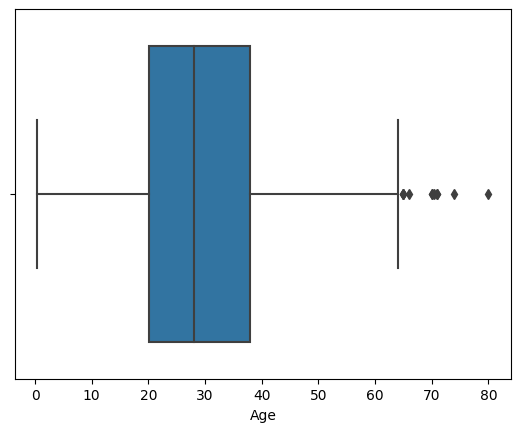

In [13]:
sns.boxplot(x = 'Age', data = df)
plt.show()

In [14]:
df['Age'] = np.where(df['Age'] > upper_threshold, upper_threshold, df['Age'] )
df['Age'] = np.where(df['Age'] < lower_threshold, lower_threshold, df['Age'] )

In [15]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
result = np.where(arr > 3)
print(result)


(array([3, 4]),)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


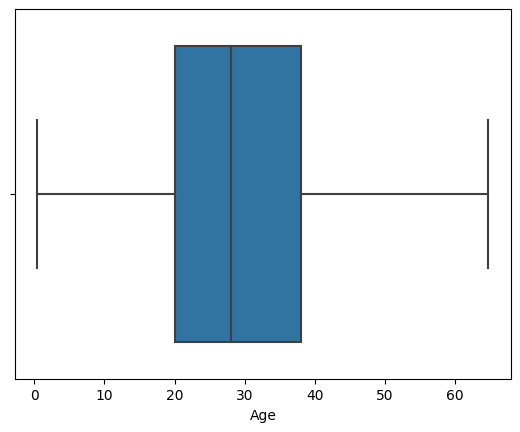

In [17]:
sns.boxplot(x = 'Age', data = df)
plt.show()

In [18]:
# df['Age'].value_counts()
df.sort_values('Age',ascending=False)
# df.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
493,0,1,male,64.8125,0,0,49.5042,C
851,0,3,male,64.8125,0,0,7.7750,S
630,1,1,male,64.8125,0,0,30.0000,S
96,0,1,male,64.8125,0,0,34.6542,C
54,0,1,male,64.8125,0,1,61.9792,C
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


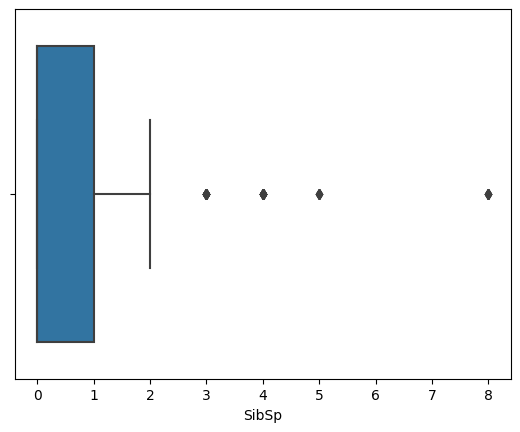

In [20]:
sns.boxplot(x='SibSp',data=df)
plt.show()

In [21]:
age_median = df['Age'].median()
age_median

28.0

In [22]:
# missing value is replaced by missing values
df['Age'].replace(np.nan, age_median, inplace=True)

In [23]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
emp_mode = df['Embarked'].mode()
emp_mode

0    S
Name: Embarked, dtype: object

In [26]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [27]:
df['Embarked'] = df['Embarked'].replace(np.nan, emp_mode[0])

In [28]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
duplicate = df.duplicated()
duplicate.sum()
df[duplicate]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,28.0,0,0,7.7500,Q
55,1,1,male,28.0,0,0,35.5000,S
76,0,3,male,28.0,0,0,7.8958,S
77,0,3,male,28.0,0,0,8.0500,S
87,0,3,male,28.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,28.0,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Encoding

In [31]:
df=pd.get_dummies(df, columns=["Sex","Embarked","Pclass"])
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
4,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


In [32]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female       bool
Sex_male         bool
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
Pclass_1         bool
Pclass_2         bool
Pclass_3         bool
dtype: object

In [33]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [34]:
#df[['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']] = df[['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']].astype(int)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [36]:
X = df.drop(['Survived'], axis=1)

y = df[['Survived']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
model=LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression()

In [54]:
model.score(X_train,y_train)

0.8089887640449438

In [55]:
model.score(X_test, y_test)

0.7985074626865671

In [42]:
# from sklearn.mertics import confusion_matrix, ConfusionMatrixDisplay
# Tahminler
# y_pred = model.predict(X_test)
# # Confusion matrix oluşturma
# cm = confusion_matrix(y_test, y_pred)
# cm

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

criterions = ["squared_error", "friedman_mse", "absolute_error", "poisson"]


for cr in criterions:
    model_dtr = DecisionTreeRegressor(max_depth=4, criterion=cr)
    model_dtr.fit(X_train, y_train)
    # Fit the model with the train data
    print("DecisionTreeClassifier, criterion:", cr)
    print("Test::", model_dtr.score(X_test, y_test))
    print("Train::", model_dtr.score(X_train, y_train))

from sklearn.ensemble import BaggingRegressor

for n in [20,22,25,30,40,50, 100]:
    modle_lgr = BaggingRegressor(n_estimators=n)
    modle_lgr.fit(X_train, y_train)
    print("\n n_estimators ", n)
    print("Train:: ",  modle_lgr.score(X_train,y_train))
    print("Test:: ", modle_lgr.score(X_test, y_test))

DecisionTreeClassifier, criterion: squared_error
Test:: 0.4673838407207417
Train:: 0.5120939940616551
DecisionTreeClassifier, criterion: friedman_mse
Test:: 0.4673838407207417
Train:: 0.5120939940616551
DecisionTreeClassifier, criterion: absolute_error
Test:: 0.13857142857142857
Train:: 0.22971302140951388
DecisionTreeClassifier, criterion: poisson
Test:: 0.4754559759735635
Train:: 0.5009006082531102

 n_estimators  20
Train::  0.8663119200168732
Test::  0.42014047144900446

 n_estimators  22
Train::  0.8621755913543139
Test::  0.4155260124037291

 n_estimators  25
Train::  0.868618643735781
Test::  0.4306109758900011

 n_estimators  30
Train::  0.8640209482461776
Test::  0.40367437864528455

 n_estimators  40
Train::  0.8713996362784484
Test::  0.404979267308778

 n_estimators  50
Train::  0.8735185105443067
Test::  0.4207541459255437

 n_estimators  100
Train::  0.87724316637453
Test::  0.40641098915073814


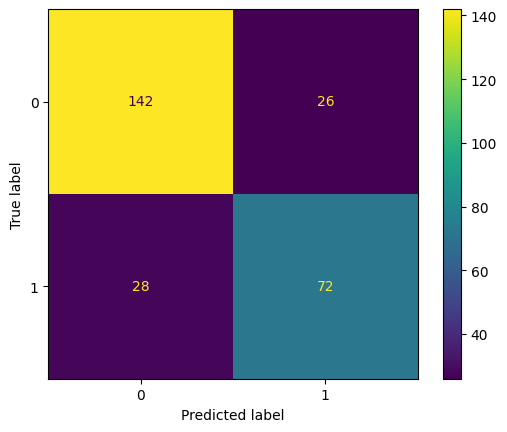

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

conf = ConfusionMatrixDisplay(cm)
conf.plot()
plt.show()

In [ ]:
# 72/()

In [ ]:
(142+72)/268

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.73      0.72      0.73       100

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [ ]:
# f1_Score = (2*recall)/(recall+precision)
f1_Score = (2*0.84)/(0.85+0.84)
f1_Score

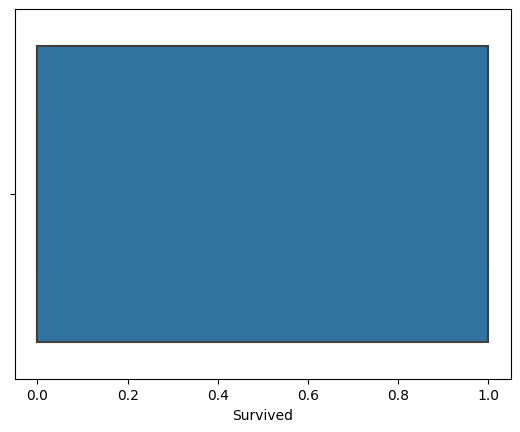

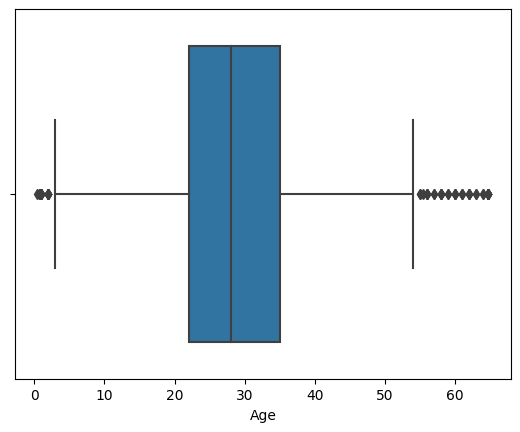

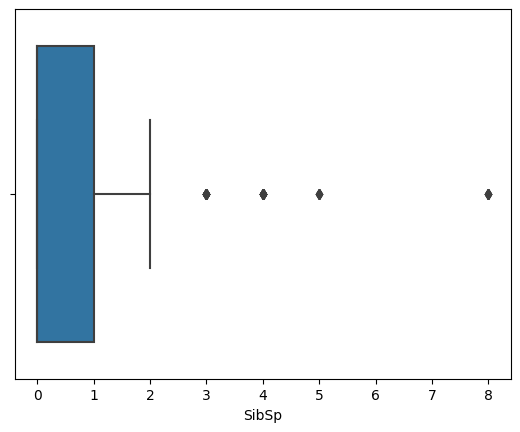

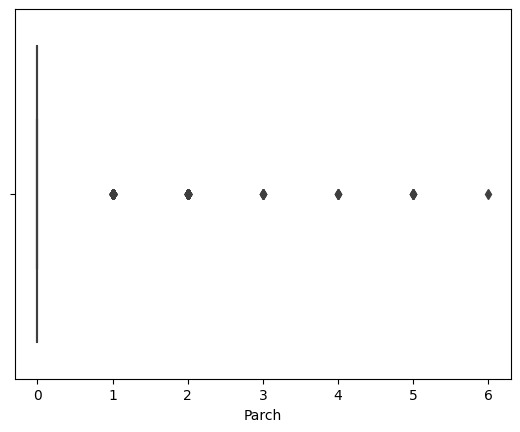

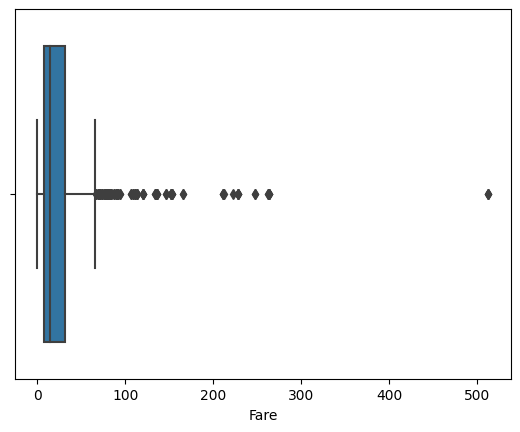

In [46]:
numeric_columns = df.select_dtypes(include=["number"])
for col in numeric_columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    higher_range = Q3+1.5*IQR
    return lower_range, higher_range

outliers_columns = ["Age", "SibSp", "Parch", "Fare"]

cleaned_df = df
for outlier_col in outliers_columns:
    lower, upper = remove_outlier(df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]>upper, upper, cleaned_df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]<lower, lower, cleaned_df[outlier_col])
    
cleaned_df.sample(5)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
376,1,22.0,0.0,0.0,7.2500,True,False,False,False,True,False,False,True
637,0,31.0,1.0,0.0,26.2500,False,True,False,False,True,False,True,False
236,0,44.0,1.0,0.0,26.0000,False,True,False,False,True,False,True,False
628,0,26.0,0.0,0.0,7.8958,False,True,False,False,True,False,False,True
640,0,20.0,0.0,0.0,7.8542,False,True,False,False,True,False,False,True


In [59]:
Y=df["Survived"]
X =df.drop(["Survived"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)


# solver : {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'},             default='lbfgs'

    
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
print("LogisticRegression Cleaning outliers")
print("Train:: ", model_lr.score(X_train,Y_train))
print("Test:: ", model_lr.score(X_test, Y_test))

LogisticRegression Cleaning outliers
Train::  0.8105939004815409
Test::  0.7798507462686567


In [62]:
std_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.375000,0.4,0.0,0.110460,False,True,False,False,True,False,False,True
1,1.0,0.682692,0.4,0.0,1.000000,True,False,True,False,False,True,False,False
2,1.0,0.451923,0.0,0.0,0.120745,True,False,False,False,True,False,False,True
3,1.0,0.625000,0.4,0.0,0.809027,True,False,False,False,True,True,False,False
4,0.0,0.625000,0.0,0.0,0.122649,False,True,False,False,True,False,False,True


In [64]:
for csol in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
    model_lr = LogisticRegression(solver=csol)
    model_lr.fit(X_train, Y_train)
    print("\nLogisticRegression, solver-", csol)
    print("Train:: ", model_lr.score(X_train,Y_train))
    print("Test:: ", model_lr.score(X_test, Y_test))


LogisticRegression, solver- lbfgs
Train::  0.8105939004815409
Test::  0.7798507462686567

LogisticRegression, solver- liblinear
Train::  0.812199036918138
Test::  0.7798507462686567

LogisticRegression, solver- newton-cg
Train::  0.8105939004815409
Test::  0.7798507462686567

LogisticRegression, solver- newton-cholesky
Train::  0.8105939004815409
Test::  0.7798507462686567

LogisticRegression, solver- sag
Train::  0.8105939004815409
Test::  0.7798507462686567

LogisticRegression, solver- saga
Train::  0.8105939004815409
Test::  0.7798507462686567


In [ ]:
for csol in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
    model_lr = LogisticRegression(solver=csol)
    model_lr.fit(X_train, Y_train)
    print("\nLogisticRegression: ", csol)
    print("Train:: ", model_lr.score(X_train,Y_train))
    print("Test:: ", model_lr.score(X_test, Y_test))

In [66]:
Y= std_df["Survived"]
X = std_df.drop(["Survived"], axis=1)

Xstd_train, Xstd_test, Ystd_train, Ystd_test = train_test_split(X,Y,test_size=.30, random_state=1)


for csol in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
    model_lr = LogisticRegression(solver=csol)
    model_lr.fit(Xstd_train, Ystd_train)
    print("\nLogisticRegression + standarization: solver: ", csol)
    print("Train:: ", model_lr.score(Xstd_train,Ystd_train))
    print("Test:: ", model_lr.score(Xstd_test, Ystd_test))


LogisticRegression + standarization: solver:  lbfgs
Train::  0.8105939004815409
Test::  0.7798507462686567

LogisticRegression + standarization: solver:  liblinear
Train::  0.812199036918138
Test::  0.7798507462686567

LogisticRegression + standarization: solver:  newton-cg
Train::  0.8105939004815409
Test::  0.7798507462686567

LogisticRegression + standarization: solver:  newton-cholesky
Train::  0.8105939004815409
Test::  0.7798507462686567

LogisticRegression + standarization: solver:  sag
Train::  0.8105939004815409
Test::  0.7798507462686567

LogisticRegression + standarization: solver:  saga
Train::  0.8105939004815409
Test::  0.7798507462686567


In [ ]:
Y=cleaned_df["Survived"]
X =cleaned_df.drop(["Survived"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)


# solver : {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'},             default='lbfgs'

    
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
print("LogisticRegression Cleaning outliers")
print("Train:: ", model_lr.score(X_train,Y_train))
print("Test:: ", model_lr.score(X_test, Y_test))

In [48]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1.0,0.0,7.2500,False,True,False,False,True,False,False,True
1,1,38.0,1.0,0.0,65.6344,True,False,True,False,False,True,False,False
2,1,26.0,0.0,0.0,7.9250,True,False,False,False,True,False,False,True
3,1,35.0,1.0,0.0,53.1000,True,False,False,False,True,True,False,False
4,0,35.0,0.0,0.0,8.0500,False,True,False,False,True,False,False,True


In [49]:
cleaned_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1.0,0.0,7.2500,False,True,False,False,True,False,False,True
1,1,38.0,1.0,0.0,65.6344,True,False,True,False,False,True,False,False
2,1,26.0,0.0,0.0,7.9250,True,False,False,False,True,False,False,True
3,1,35.0,1.0,0.0,53.1000,True,False,False,False,True,True,False,False
4,0,35.0,0.0,0.0,8.0500,False,True,False,False,True,False,False,True


In [51]:
numeric_columns.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()

std_cleaned_df = cleaned_df
std_df = df

for col in numeric_columns:
    std_cleaned_df[col] = min_max_scale.fit_transform(std_cleaned_df[[col]])
    std_df[col] = min_max_scale.fit_transform(std_df[[col]])

std_cleaned_Y = std_cleaned_df[["Survived"]]
std_cleaned_X = std_cleaned_df.drop(["Survived"], axis = 1)


std_Y = std_df[["Survived"]]
std_X = std_df.drop(["Survived"], axis = 1)

In [54]:
from sklearn.neighbors import KNeighborsRegressor
Y = df["Survived"]
X = df.drop(["Survived"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)

for n in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n, p=1)
    model_knn.fit(X_train, Y_train)
    print("\n p = 2, n_neighbors:", n)
    print("Train:: ",  model_knn.score(X_train,Y_train))
    print("Test:: ", model_knn.score(X_test, Y_test))


 p = 2, n_neighbors: 5
Train::  0.6121670448983224
Test::  0.2761943734015343

 p = 2, n_neighbors: 6
Train::  0.5805098834650964
Test::  0.2900382052982222

 p = 2, n_neighbors: 7
Train::  0.5635174908302663
Test::  0.2797629196606177

 p = 2, n_neighbors: 8
Train::  0.5695485624415966
Test::  0.27602301790281314

 p = 2, n_neighbors: 9
Train::  0.5611514338468164
Test::  0.3004746718870047

 p = 2, n_neighbors: 10
Train::  0.5511089974636231
Test::  0.2993464052287581

 p = 2, n_neighbors: 11
Train::  0.5391478038108541
Test::  0.3147038861058855

 p = 2, n_neighbors: 12
Train::  0.5288196144014794
Test::  0.32653058002589097

 p = 2, n_neighbors: 13
Train::  0.5219568544712565
Test::  0.3334147174005524

 p = 2, n_neighbors: 14
Train::  0.5209795405279987
Test::  0.3479942701718368

 p = 2, n_neighbors: 15
Train::  0.5166180156929057
Test::  0.35350320482460273

 p = 2, n_neighbors: 16
Train::  0.511261647657745
Test::  0.34718314862176747

 p = 2, n_neighbors: 17
Train::  0.505773

In [58]:
Y = cleaned_df["Survived"]
X = cleaned_df.drop(["Survived"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)

for n in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n)
    model_knn.fit(X_train, Y_train)
    print("\n p = 2, n_neighbors:", n)
    print("Train:: ",  model_knn.score(X_train,Y_train))
    print("Test:: ", model_knn.score(X_test, Y_test))


 p = 2, n_neighbors: 5
Train::  0.607731500022249
Test::  0.29508155726058527

 p = 2, n_neighbors: 6
Train::  0.5855152726481655
Test::  0.2756528054055759

 p = 2, n_neighbors: 7
Train::  0.5635174908302663
Test::  0.2810063155697061

 p = 2, n_neighbors: 8
Train::  0.5667330310261203
Test::  0.28863668655868135

 p = 2, n_neighbors: 9
Train::  0.5582423187660583
Test::  0.29765400524138785

 p = 2, n_neighbors: 10
Train::  0.550138722021982
Test::  0.3113793691389598

 p = 2, n_neighbors: 11
Train::  0.5413816138594965
Test::  0.3041298828790109

 p = 2, n_neighbors: 12
Train::  0.5287233569171896
Test::  0.3101354551482427

 p = 2, n_neighbors: 13
Train::  0.5178969530036965
Test::  0.3216981021033746

 p = 2, n_neighbors: 14
Train::  0.5168070732498047
Test::  0.3291879070468765

 p = 2, n_neighbors: 15
Train::  0.515632339053778
Test::  0.33129891699030645

 p = 2, n_neighbors: 16
Train::  0.5074173643789215
Test::  0.3304045893719806

 p = 2, n_neighbors: 17
Train::  0.50469429

In [56]:
Y = std_cleaned_df["Survived"]
X = std_cleaned_df.drop(["Survived"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)

for n in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n, p=1)
    model_knn.fit(X_train, Y_train)
    print("\n p = 2, n_neighbors:", n)
    print("Train:: ",  model_knn.score(X_train,Y_train))
    print("Test:: ", model_knn.score(X_test, Y_test))


 p = 2, n_neighbors: 5
Train::  0.6121670448983224
Test::  0.2761943734015343

 p = 2, n_neighbors: 6
Train::  0.5805098834650964
Test::  0.2900382052982222

 p = 2, n_neighbors: 7
Train::  0.5635174908302663
Test::  0.2797629196606177

 p = 2, n_neighbors: 8
Train::  0.5695485624415966
Test::  0.27602301790281314

 p = 2, n_neighbors: 9
Train::  0.5611514338468164
Test::  0.3004746718870047

 p = 2, n_neighbors: 10
Train::  0.5511089974636231
Test::  0.2993464052287581

 p = 2, n_neighbors: 11
Train::  0.5391478038108541
Test::  0.3147038861058855

 p = 2, n_neighbors: 12
Train::  0.5288196144014794
Test::  0.32653058002589097

 p = 2, n_neighbors: 13
Train::  0.5219568544712565
Test::  0.3334147174005524

 p = 2, n_neighbors: 14
Train::  0.5209795405279987
Test::  0.3479942701718368

 p = 2, n_neighbors: 15
Train::  0.5166180156929057
Test::  0.35350320482460273

 p = 2, n_neighbors: 16
Train::  0.511261647657745
Test::  0.34718314862176747

 p = 2, n_neighbors: 17
Train::  0.505773

In [57]:
Y = std_df["Survived"]
X = std_df.drop(["Survived"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)

for n in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n, p=1)
    model_knn.fit(X_train, Y_train)
    print("\n p = 2, n_neighbors:", n)
    print("Train:: ",  model_knn.score(X_train,Y_train))
    print("Test:: ", model_knn.score(X_test, Y_test))


 p = 2, n_neighbors: 5
Train::  0.6121670448983224
Test::  0.2761943734015343

 p = 2, n_neighbors: 6
Train::  0.5805098834650964
Test::  0.2900382052982222

 p = 2, n_neighbors: 7
Train::  0.5635174908302663
Test::  0.2797629196606177

 p = 2, n_neighbors: 8
Train::  0.5695485624415966
Test::  0.27602301790281314

 p = 2, n_neighbors: 9
Train::  0.5611514338468164
Test::  0.3004746718870047

 p = 2, n_neighbors: 10
Train::  0.5511089974636231
Test::  0.2993464052287581

 p = 2, n_neighbors: 11
Train::  0.5391478038108541
Test::  0.3147038861058855

 p = 2, n_neighbors: 12
Train::  0.5288196144014794
Test::  0.32653058002589097

 p = 2, n_neighbors: 13
Train::  0.5219568544712565
Test::  0.3334147174005524

 p = 2, n_neighbors: 14
Train::  0.5209795405279987
Test::  0.3479942701718368

 p = 2, n_neighbors: 15
Train::  0.5166180156929057
Test::  0.35350320482460273

 p = 2, n_neighbors: 16
Train::  0.511261647657745
Test::  0.34718314862176747

 p = 2, n_neighbors: 17
Train::  0.505773

In [ ]:
from sklearn import metrics

In [ ]:
predictions=model.predict(X_test)

In [ ]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

sns.heatmap(df_cm, annot=True,fmt='g')

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions, labels=[1, 0])
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create DataFrame from normalized confusion matrix
df_cm = pd.DataFrame(cm_normalized, index=["1", "0"], columns=["Predict 1", "Predict 0"])

In [ ]:
sns.heatmap(df_cm, annot=True,fmt='g')

In [ ]:
from sklearn.metrics import confusion_matrix

# Tahminler
# y_pred = clf.predict(X_test)



In [ ]:
# Tahminler
y_pred = clf.predict(X_test)

# Sample true labels (Survived) and predicted labels
true_labels = cleaned_df['Survived']
# Sample of predicted labels (assuming all passengers predicted as not survived for demonstration)
predicted_labels = [0] * len(true_labels)

y_pred = clf.predict(X_test)

# Confusion matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

